***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [2. Mathmatical Groundwork](2_0_introduction.ipynb)  
    * Previous: [2.10 Linear Algrebra](2_10_linear_algebra.ipynb)
    * Next: [2.12 Solid Angle](2_12_solid_angle.ipynb)

***

Import standard modules:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [7]:
from scipy.optimize import leastsq
plt.rcParams['figure.figsize'] = (18, 6)

In [8]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

## 2.11 Least-squares Minimization<a id='groundwork:sec:leastsquares'></a>

In the field of radio interferometry, we often encounter problems which must be solved numerically. One such problem is least-squares minimization. Conceptually, it is very simple. Given a model and some data, we want to find the values of a set of parameters which minimize the difference between our model and our observations. 在射电干涉测量中，经常遇到需要用数值方法解决的问题。其中一个就是最小二乘法。从概念上讲，它非常简单，给定一个模型和一些数据，我们希望找到一组参数的值，这些参数可以最小化模型和观测值之间的差异。

Firstly, we need to phrase the problem in simple mathematics. Let us start by defining the quantities of interest and the function we wish to minimize. 首先，我们需要用简单的数学表达这个问题。让我们从定义感兴趣的量和我们希望最小化的函数开始。

We will refer to our data vector as $\mathbf{d}$ and our model vector as $\mathbf{m}$. These vectors contain the measured values and those predicted by the model respectively. We wish to minimize the $L^2$ or Euclidean vector norm of their difference. Whilst you may not have called it that in the past, you have almost certainly encountered it,我们将数据符号化$\mathbf{d}$和我们的模型向量$\mathbf{m}$。这些向量分别包含实测值和模型预测值。我们希望减少$L^2$ 或欧几里得向量范数的差异。虽然在过去您可能没有这样称呼它，但您几乎肯定遇到过它

$$\lVert\mathbf{r}\rVert = \lVert\mathbf{d}-\mathbf{m}\rVert = \sqrt{\sum\limits_{i=1}^N(d_i - m_i)^2}.$$

$\mathbf{r}$ is the residual vector and it is a measure of the difference between the values predicted by our model and the observed values.$\mathbf{r}$ 是残差向量，表征测量值和模型预测值之间的差异。

It is important to note that in general $\mathbf{m}$ is a function of a number of parameters, such as $(x_1, x_2, x_3, \dots)$. These parameters form the parameter vector $\mathbf{x}$ which is what we ultimately want to determine.重要的是要注意,一般$\mathbf{m}$ 是一个函数的参数,如$(x_1, x_2, x_3, \dots)$。这些参数形式的参数向量$\mathbf{x}$是我们最终想要的决定。

There are many methods which solve problems of the given form. However, we will stick to explaining two of the most commonly used in radio interferometry. Specifically, these are Gauss-Newton and Levenberg–Marquardt; both of which are technically non-linear least squares solvers. They can be applied to linear problems too.有许多方法可以解决给定形式的问题。然而，我们将坚持解释两个最常用的无线电干涉测量方法。具体来说，他们是Gauss-Newton and Levenberg–Marquardt;它们都是严格意义上的非线性最小二乘计算器。它们也可以应用于线性问题。

We will not present the derivations of the methods, although they are readily available. The Gauss-Newton update rule is given by the following:我们将不介绍这些方法的派生，尽管它们很容易得到。高斯-牛顿更新规则如下所示

$$\delta \mathbf{x} = {(\mathbb{J}^T\mathbb{J})}^{-1} \mathbb{J}^T \mathbf{r}.$$

This is far simpler than it may at first appear. $\delta \mathbf{x}$ is simply the update to the current best guess of the parameter vector. $\mathbb{J}$ is the Jacobian of the problem which we will discuss in detail shortly. $(\cdot)^T$ denotes a matrix transpose, and $(\cdot)^{-1}$ denotes a matrix inverse. $\mathbf{r}$ is still the residual vector. In practice we use an iterative algorithm which starts from some initial guess which is updated in accordance with:

这乍看起来要简单得多。$\delta \mathbf{x}$只是更新到当前参数向量的最佳猜测。Jacobian矩阵的问题,我们稍后将详细讨论. $(\cdot)^T$ 代表一个矩阵的转置, $(\cdot)^{-1}$ 代表一个矩阵的逆。$\mathbf{r}$ 残余向量。在实际应用中，我们使用了一种迭代算法，它从一些初始的猜测开始，然后根据这些猜测进行更新 

$$x_{k+1} = x_{k} + \delta x$$

The Jacobian is simply a matrix of the first derivatives of the model term relative to the parameter vector. This can be writen analytically for a model vector of length $M$ and a parameter vector of length $N$ as:雅可比矩阵就是模型项相对于参数向量的一阶导数的矩阵。这可以书面分析模型向量的长度$M$ 和参数长度$N$


$$\mathbb{J} = \frac{\delta \mathbf{m}}{\delta \mathbf{x}} = \begin{bmatrix}
    \frac{\delta m_1}{\delta x_1} & \frac{\delta m_1}{\delta x_2} & \dots  & \frac{\delta m_1}{\delta x_N} \\
    \frac{\delta m_2}{\delta x_1} & \frac{\delta m_2}{\delta x_2} & \dots  & \frac{\delta m_2}{\delta x_N} \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\delta m_M}{\delta x_1} & \frac{\delta m_M}{\delta x_2} & \dots  & \frac{\delta m_M}{\delta x_N}
\end{bmatrix}$$ 

This convention is somewhat unique to the radio interferometry problem. The Jacobian is usually defined as the derivative of the residual vector relative to the parameter vector. This has an associated change of sign, though it doesn't alter the algorithm. For the sake of consistency, we will stick to the positive, interferometric convention. 

这一惯例在无线电干涉测量问题上有些独特。雅可比矩阵通常定义为剩余向量相对于参数向量的导数。这有一个相关的符号变化，虽然它不改变算法。为了一致性，我们将积极的坚持使用干涉约定的符号。

For the sake of completeness, we will also introduce the Levenberg-Marquardt update rule. It is used more frequently as it has better convergence behaviour than basic Gauss-Newton. The update rule itself is very similar:

为了完整起见，我们还将介绍Levenberg-Marquardt更新规。它比基本的高斯-牛顿算法具有更好的收敛性，因而使用频率更高。更新规则本身非常类似

$$\delta \mathbf{x} = {(\mathbb{J}^T\mathbb{J}+\lambda_{LM} \mathbf{D})}^{-1} \mathbb{J}^T \mathbf{r}.$$

The addition of the $\lambda_{LM} \mathbf{D}$ factor leads to the Levenberg-Marquardt algorithm being referred to as a damped least squares method. There is a degree of choice regarding the matrix $\mathbf{D}$. However, in practice it is usually the identity matrix, $\mathbf{I}$, or a matrix containing the diagonal entries of $\mathbb{J}^T\mathbb{J}$. The lambda factor is used to tune the algorithm and improve its convergence. The choice of lambda is largely heurstic, and a value which works in one case may fail completely in another. This highlights an important fact regarding least squares methods: the choice of starting parameters does alter the behaviour of the algorithm. This will become clearer as we proceed.

附加的$\lambda_{LM} \mathbf{D}$使得Levenberg-Marquardt算法被称为阻尼最小二乘法。有一个关于矩阵$\mathbf{D}$的程度选择。然而,在实践中通常是单位矩阵,$\mathbf{I}$或矩阵的对角元素包含$\mathbb{J}^T\mathbb{J}$。利用lambda因子对算法进行优化，提高了算法的收敛性。lambda的选择很大程度上是启发式的，在一种情况下有效的值在另一种情况下可能完全失败。这突出了关于最小二乘方法的一个重要事实:初始参数的选择确实会改变算法的行为。随着我们的进展，这一点将变得更加清楚。

It is useful to note that, when we implement these methods, it is worth implementing Levenberg-Marquardt as setting $\lambda$ to zero will always return us to the Gauss-Newton approach. 注意,当我们实现这些方法是很有用的,Levenberg-Marquardt设置𝜆 为零则会退化为Gauss-Newton方法

Armed with the mathematical background above, we can now begin to implement a rudimentay Levenberg-Marquardt solver. We will start with a relatively simple function and demonstrate how we set up the algorithm. The function which we will use is as follows:带着上面的数学背景,我们现在可以开始实现一个基本的Levenberg-Marquardt解算器。我们将从一个相对简单的函数开始，并演示如何设置算法。我们将使用的函数如下

$$ m_i = x_1 \sin(2\pi x_2 t_i + x_3).$$

This is the equation for a simple sinusoid. The parameters $x_1$, $x_2$ and $x_3$ have been used in place of the more traditional $A$, $\nu$ and $\phi$ in order to maintain a consistent notation.这是一个简单正弦函数的方程。为了保持一致的符号参数，使用$x_1$, $x_2$ and $x_3$来代替传统$A$, $\nu$ and $\phi$的符号。

As we will not be performing a true experiment, we will obtain our "measured" values by adding some gaussian noise to our model signal. 由于我们不会进行真正的实验，我们将通过在模型信号中添加一些高斯噪声来获得我们的“测量值”。

Before we begin implementing the solver, we will write out the derivatives of the model function. These will be used to construct the Jacobian. The derivatives are as follows:在开始求解之前，我们先写出模型函数的导数。这些将被用来构造雅可比矩阵。导数如下

$$ \frac{\delta m_i}{\delta x_1} = \sin(2\pi x_2 t_i + x_3)$$

$$ \frac{\delta m_i}{\delta x_2} = 2 \pi t_i x_1 \cos(2\pi x_2 t_i + x_3)$$

$$ \frac{\delta m_i}{\delta x_3} = x_1 \cos(2\pi x_2 t_i + x_3).$$

These derivatives are very easy to calculate analytically. Note that $t$ is the independent variable for the problem and its index, $i$, simply enumerates the number of samples we have, which is in turn simply the length of our residual vector. 这些导数很容易分析计算。 注意$t$ 是问题的独立变量和它的指数,$i$简单地列举了样本的数量,反过来这就是残差向量的长度。

In [9]:
def sinusoid(x, t):
    """
    Returns a vector containing the values of a sinusoid with parameters x evaluated at points t.
    
    INPUTS:
    t    Value of independent variable at the sampled points.
    x    Vector of parameters.    
    """
    
    x1 = x[0]     #Amplitude
    x2 = x[1]     #Frequency
    x3 = x[2]     #Phase-shift
    
    return x1*np.sin(2*np.pi*x2*t + x3)

In [10]:
def sinusoid_jacobian(x, t):
    """
    Returns the Jacobian corresponding to the function defined in sinusoid.
    
    INPUTS:
    t    Value of independent variable at the sampled points.
    x    Vector of parameters.    
    """
    
    x1 = x[0]     #Amplitude
    x2 = x[1]     #Frequency
    x3 = x[2]     #Phase-shift
    
    jacobian = np.empty([t.shape[0], x.shape[0]])
    jacobian[:,0] = np.sin(2*np.pi*x2*t + x3)
    jacobian[:,1] = 2*np.pi*t*x1*np.cos(2*np.pi*x2*t + x3)
    jacobian[:,2] = x1*np.cos(2*np.pi*x2*t + x3)
    
    return jacobian    

In [11]:
def sinusoid_residual(x, t, d):
    """
    Returns a vector containing the residual values.
    
    INPUTS:
    d    Vector of measured values.
    t    Value of independent variable at the sampled points.
    x    Vector of parameters.    
    """
    
    return d - sinusoid(x, t)

The three functions defined above will be used frequently during the Levenberg-Marquardt solution procedure. The following few lines of code just set up the values we need to call the Levenberg-Marquardt solver.上述定义的三个函数将在Levenberg-Marquardt求解过程中频繁使用。下面几行代码只是设置了我们需要调用Levenberg-Marquardt求解器的值。

In [12]:
t = np.arange(-0.06, 0.06, 0.06/300)          #The points at which we will be taking our "measurements"
noise = 2*np.random.normal(size=(t.shape[0])) #A noise vector which we will use to manufacture "real" measurements.
true_x = np.array([10., 33.3, 0.52])          #The true values of our parameter vector.
x = np.array([8., 43.5, 1.05])                #Initial guess of parameter vector for our solver.

In [13]:
d = sinusoid(true_x, t) + noise #Our "observed" data, contructed from our true parameter values and the noise vector.
m = sinusoid(x, t)              #Our fitted function using the initial guess parameters.

The following plots show the observed data and the curve corresponding to our initial guess for the parameters.下面的图表显示了观察到的数据以及与我们对参数的初始猜测相对应的曲线

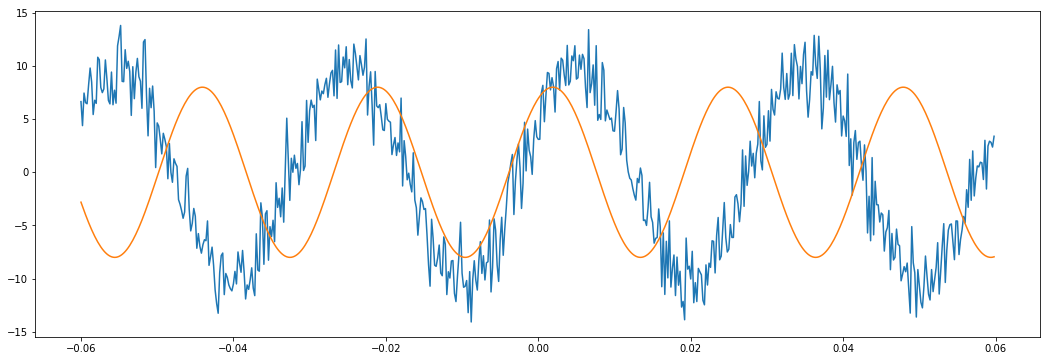

In [14]:
plt.plot(t, d)
plt.plot(t, m)
plt.show()

In [15]:
def levenberg_marquardt(d, t, x, r_func, j_func, maxit=100, lamda=1, K=10, eps1=1e-6, eps2=1e-6):
    """
    Returns a vector containing the optimal parameter values found by the algorithm.
    
    INPUTS:
    d         Vector of measured values.
    t         Value of independent variable at the sampled points.
    x         Vector of parameters.
    r_func    Function which generates the residual vector.
    j_func    Function which generates the Jacobian.
    maxiter   Maximum number of iterations.
    lamda     Initial value of tuning parameter.
    K         Initial value of retuning factor.
    eps1      First tolerance parameter - triggers when residual is below this number.
    eps2      Second tolerance parameter - triggers when relative changes to the parameter
              vector are below this number.
    """
    
    #Initialises some important values and stores the original lamda value.
    
    r = r_func(x, t, d)
    old_chi = np.linalg.norm(r)
    olamda = lamda
    it = 0
    
    while True:
        
        #Heavy lifting portion of the algorithm. Computes the parameter update.
        #This is just the implementation of the mathmatical update rule.
        
        J = j_func(x, t)
        JT = J.T
        JTJ = JT.dot(J)
        JTJdiag = np.eye(JTJ.shape[0])*JTJ
        JTJinv = np.linalg.pinv(JTJ + lamda*JTJdiag)
        JTr = JT.dot(r)
        
        delta_x = JTJinv.dot(JTr)
        x += delta_x
        
        #Convergence tests. If a solution has been found, returns the result.
        #The chi value is the norm of the residual and is used to determine
        #whether the solution is improving. If the chi value is sufficiently 
        #small, the function terminates. The second test checks to see whether
        #or not the solution is improving, and terminates if it isn't.
        
        r = r_func(x, t, d)
        new_chi = np.linalg.norm(r)
        
        if new_chi < eps1:
            return x
        elif np.linalg.norm(delta_x) < eps2*(np.linalg.norm(x) + eps2):
            return x
        
        #Tuning stage. If the parameter update was good, continue and restore lamda.
        #If the update was bad, scale lamda by K and revert last update.
        
        if new_chi > old_chi:
            x -= delta_x
            lamda = lamda*K
        else:
            old_chi = new_chi
            lamda = olamda
            
        #If the number of iterations grows too large, return the last value of x.
        
        it += 1
            
        if it >= maxit:
            return x

The above is the main function of the Levenberg-Marquardt algorithm. The code may appear daunting at first, but all it does is implement the Levenberg-Marquardt update rule and some checks of convergence. We can now apply it to the problem with relative ease to obtain a numerical solution for our parameter vector.以上就是Levenberg-Marquardt算法的主要功能。这段代码乍一看可能令人生畏，但它所做的只是实现Levenberg-Marquardt更新规则和一些收敛性检查。现在我们可以相对容易地把它应用到这个问题中来得到参数向量的数值解。

In [16]:
solved_x = levenberg_marquardt(d, t, x, sinusoid_residual, sinusoid_jacobian)
print(solved_x)

[10.00807371 33.23666155  0.5107659 ]


We can now compare our numerical result with both the truth and the data. The following plot shows the various quantities of interest.现在我们可以把我们的数值结果与事实和数据进行比较。下面的图显示了各种有趣的数量。

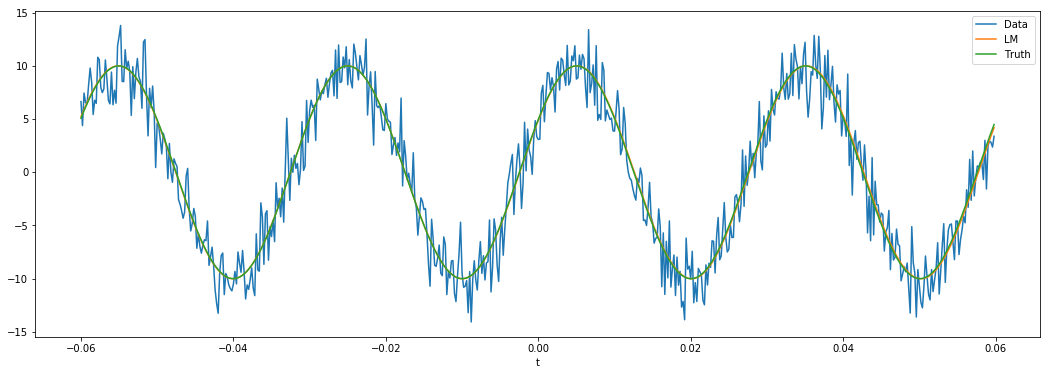

In [17]:
plt.plot(t, d, label="Data")
plt.plot(t, sinusoid(solved_x, t), label="LM")
plt.plot(t, sinusoid(true_x, t), label="Truth")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.show()

The fitted values are so close to the true values that it is almost impossible to differentiate between the red and green lines in the above plot. The true values have been omitted from the following plot to make it clearer that the numerical solution does an excellent job of arriving at the correct parameter values.拟合值与真实值非常接近，几乎无法区分上图中的红绿线。为了更清楚地说明数值解在得到正确的参数值方面做得很好，下面的图中省略了真实值。

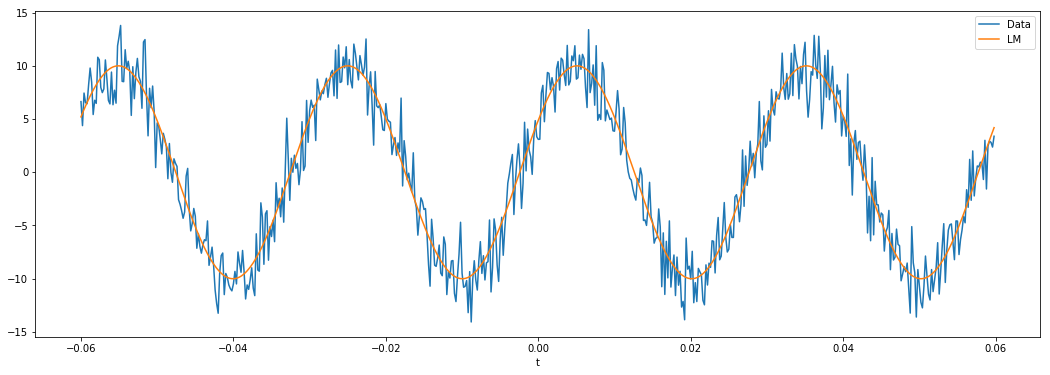

In [18]:
plt.plot(t, d, label="Data")
plt.plot(t, sinusoid(solved_x, t), label="LM")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.show()

A final, important thing to note is that the Levenberg-Marquardt algorithm is already implemented in Python. It is used in scipy.optimise.leastsq. This is often useful for doing rapid numerical solution without the need for an analytic Jacobian. As a simple proof, we can call the built-in method to verify our results.最后，需要注意的重要一点是，Levenberg-Marquardt算法已经在Python中实现。它用于scipy.optimise.leastsq。在不需要解析雅可比矩阵的情况下，这对于快速数值求解是很有用的。作为一个简单的证明，我们可以调用内置方法来验证我们的结果。

scipy.optimize.leastsq:  [-1.85593308 45.05938966  0.63813785]
Our LM:  [10.00807371 33.23666155  0.5107659 ]


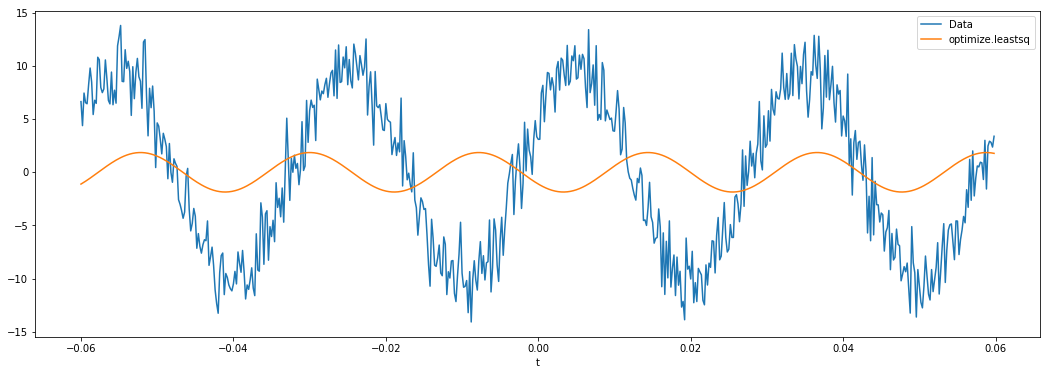

In [20]:
x = np.array([8., 43.5, 1.05]) 

leastsq_x = leastsq(sinusoid_residual, x, args=(t, d)) 

print("scipy.optimize.leastsq: ", leastsq_x[0])
print("Our LM: ", solved_x)

plt.plot(t, d, label="Data")
plt.plot(t, sinusoid(leastsq_x[0], t), label="optimize.leastsq")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.show()

In this case, the built-in method clearly fails. I have done this deliberately to illustrate a point - a given implementation of an algorithm might not be the best one for your application. In this case, the manner in which the tuning parameters are handled prevents the solution from converging correctly. This can be avoided by choosing a starting guess closer to the truth and once again highlights the importance of initial values in problems of this type.在这种情况下，内置方法显然会失败。我特意这样做是为了说明一点——给定的算法实现可能并不适合您的应用程序。在这种情况下，处理调优参数的方式会阻止解决方案正确地收敛。这可以通过选择一个更接近事实的初始猜测来避免，并再次强调初值在此类问题中的重要性。

scipy.optimize.leastsq:  [10.00809184 33.23666347  0.51076605]
Our LM:  [10.00807371 33.23666155  0.5107659 ]


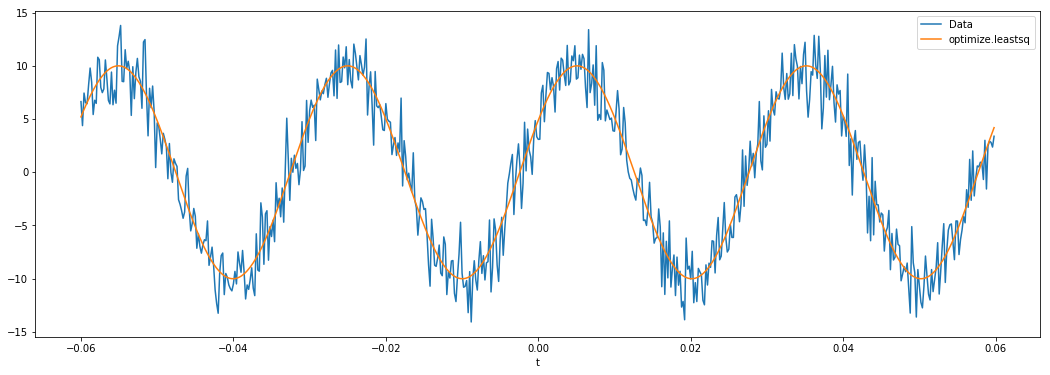

In [22]:
x = np.array([8., 35., 1.05]) 

leastsq_x = leastsq(sinusoid_residual, x, args=(t, d)) 

print("scipy.optimize.leastsq: ", leastsq_x[0])
print("Our LM: ", solved_x)

plt.plot(t, d, label="Data")
plt.plot(t, sinusoid(leastsq_x[0], t), label="optimize.leastsq")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.show()

With a better initial estimate, the built-in method converges without issue and its results strongly agree with those of our implementation.该方法具有较好的初始估计能力，收敛性好，结果与我们的实现结果吻合较好。

***
* Next: [2.12 Solid Angle](2_12_solid_angle.ipynb)